In [ ]:
pip install tensorflow opencv-python numpy


In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions
from collections import Counter


In [2]:
model = MobileNet(weights="imagenet")


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
def extract_frames(video_path, every_n_frames=10):
    cap = cv2.VideoCapture(video_path)
    frames = []
    frame_id = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if frame_id % every_n_frames == 0:
            frame = cv2.resize(frame, (224, 224))
            frames.append(frame)

        frame_id += 1

    cap.release()
    return frames


In [5]:
video_path = "5_second_video.mp4"
frames = extract_frames(video_path)
print("Total frames used:", len(frames))




Total frames used: 15


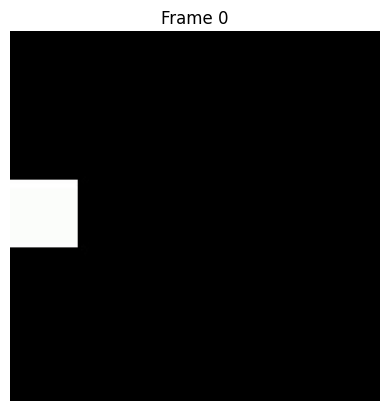

In [9]:
import cv2
import matplotlib.pyplot as plt

frame = frames[0]

# Convert BGR → RGB for correct colors
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

plt.imshow(frame_rgb)
plt.axis("off")
plt.title("Frame 0")
plt.show()


In [7]:
def classify_frames(frames, model):
    predictions = []

    for frame in frames:
        img = np.expand_dims(frame, axis=0)
        img = preprocess_input(img)

        preds = model.predict(img, verbose=0)
        label = decode_predictions(preds, top=1)[0][0]
        predictions.append(label)  # (class_id, class_name, confidence)


    return predictions


In [14]:
print(frames[0].shape)




(224, 224, 3)


In [15]:
import numpy as np

frames_np = np.array(frames)
print(frames_np.shape)


(15, 224, 224, 3)


In [16]:
print(frame_rgb[100, 150])   # [R, G, B]


[0 0 0]


In [19]:
print(frames[0][0:5, 0:5])   # top-left 5×5 pixels


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [20]:
predictions = classify_frames(frames, model)


35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [21]:
labels = [pred[1] for pred in predictions]
final_class = Counter(labels).most_common(1)

print("Final Video Prediction:", final_class)


Final Video Prediction: [('switch', 10)]


In [22]:
for i, (cls_id, cls_name, conf) in enumerate(predictions[:5]):
    print(f"Frame {i}: {cls_name} ({conf:.2f})")



Frame 0: monitor (0.08)
Frame 1: monitor (0.08)
Frame 2: switch (0.11)
Frame 3: switch (0.20)
Frame 4: switch (0.14)


EX 2